In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df=pd.read_excel('CustomerDemographic.xlsx',index=False)
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [3]:
#missing values
print(df.isna().sum())

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64


In [4]:
print(df['gender'].unique())
df['gender']=df['gender'].replace('F','Female')
df['gender']=df['gender'].replace('Femal','Female')
df['gender']=df['gender'].replace('M','Male')
df['gender']=df['gender'].replace('U','Unknown')
df.head()
df['gender']=df['gender'].replace('M','Male')
df['gender']=df['gender'].replace('U','Unknown')
df['job_industry_category']=df['job_industry_category'].replace('Argiculture','Agriculture')
df.head()

['F' 'Male' 'Female' 'U' 'Femal' 'M']


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [5]:
female=0 
male=0
unknown=0
for x in df['gender']:
    if x=='Female':
        female=female+1
    elif x=='Male':
        male=male+1
    else:
        unknown=unknown+1
perFemale=round(female*100/len(df['gender']),2) #percent female
perMale=round(male*100/len(df['gender']),2) #percent male
perUnknown=round(unknown*100/len(df['gender']),2) #percent unknown
Gender=[female,male,unknown]
perGender=[perFemale,perMale,perUnknown]
print("Number of females:",female,"Percentage:",perFemale,"\nNumber of males:",male,"Percentage:",perMale,"\nNumber of Unknown:",unknown,"Percentage:",perUnknown)

Number of females: 2039 Percentage: 50.98 
Number of males: 1873 Percentage: 46.83 
Number of Unknown: 88 Percentage: 2.2


<h2>Bike purchases with respect to gender</h2>

In [6]:
femalePurchase=df['past_3_years_bike_related_purchases'][df['gender']=='Female'].sum()
malePurchase=df['past_3_years_bike_related_purchases'][df['gender']=='Male'].sum()
unknownPurchase=df['past_3_years_bike_related_purchases'][df['gender']=='Unknown'].sum()
Gender=[femalePurchase,malePurchase,unknownPurchase]
total=0
for i in range(0,len(Gender)):
    total=total+Gender[i]
perFemale=round(femalePurchase*100/total,2) #percent female
perMale=round(malePurchase*100/total,2) #percent male
perUnknown=round(unknownPurchase*100/total,2) #percent unknown
perGender=[perFemale,perMale,perUnknown]
print("Number of female purchases:",femalePurchase,"Percentage:",perFemale,"\nNumber of male purchases:",malePurchase,"Percentage:",perMale,"\nNumber of Unknown purchases:",unknownPurchase,"Percentage:",perUnknown)

Number of female purchases: 98359 Percentage: 50.3 
Number of male purchases: 93483 Percentage: 47.8 
Number of Unknown purchases: 3718 Percentage: 1.9


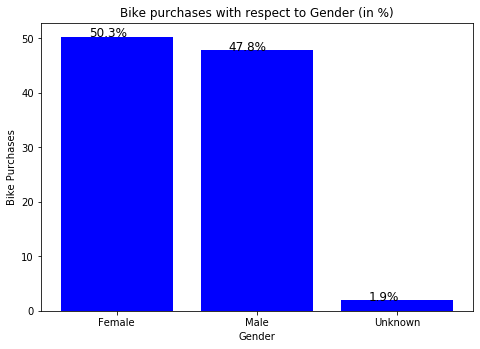

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x1=np.arange(3)
plt.bar(x1,perGender,color='b')
plt.title('Bike purchases with respect to Gender (in %)')
plt.xlabel('Gender')
plt.xticks(x1,('Female','Male','Unknown'))
for i in range(len(perGender)):
    plt.text(x = i-0.20, y = perGender[i], s = "{}%".format(perGender[i]), size = 12)
plt.ylabel('Bike Purchases')
plt.show()

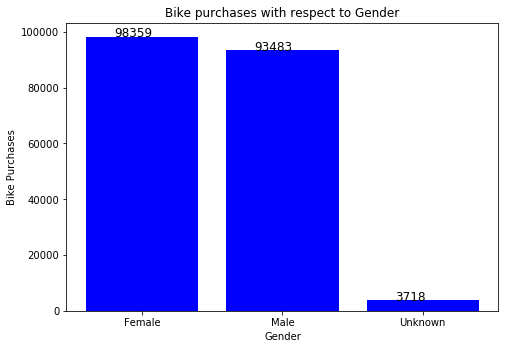

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x1=np.arange(3)
plt.bar(x1,Gender,color='b')
plt.title('Bike purchases with respect to Gender')
plt.xlabel('Gender')
plt.xticks(x1,('Female','Male','Unknown'))
for i in range(len(perGender)):
    plt.text(x = i-0.20, y = Gender[i], s = "{}".format(Gender[i]), size = 12)
plt.ylabel('Bike Purchases')
plt.show()

<h2> Age Categorization</h2>

In [9]:
from datetime import date  
def calculateAge(birthDate): 
    today = date.today() 
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day)) 
    return age 
df['Age']=0
for i in range(0,len(df['DOB'])):
    df['Age'][i]=calculateAge(df['DOB'][i])
df['Age']=df['Age'].fillna(0)
for i in range(0,len(df['DOB'])):
    if(df['Age'][i]>100):
        df['Age'][i]=df['Age'][i]-100
df.head()

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,66.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,39.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,66.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,58.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,42.0


In [10]:
mean=round(df['Age'].mean(skipna=True),0)
sd=round(df['Age'].std(skipna=True),0)
print(mean,sd)
low=mean-sd/2
high=mean+sd/2
print(low,high)

41.0 14.0
34.0 48.0


In [11]:
meanFemale=round(df['Age'][df['gender']=='Female'].mean(skipna=True),0)
sdFemale=round(df['Age'][df['gender']=='Female'].std(skipna=True),0)
print(meanFemale,sdFemale)
lowFemale=meanFemale-sdFemale/2
highFemale=meanFemale+sdFemale/2
print(lowFemale,highFemale)
meanMale=round(df['Age'][df['gender']=='Male'].mean(skipna=True),0)
sdMale=round(df['Age'][df['gender']=='Male'].std(skipna=True),0)
print(meanMale,sdMale)
lowMale=meanMale-sdMale/2
highMale=meanMale+(sdMale/2)
print(lowMale,highMale)

42.0 12.0
36.0 48.0
42.0 13.0
35.5 48.5


In [12]:
f1=0 # 
f2=0
f3=0
m1=0
m2=0
m3=0
for i in range(0,len(df)):
    if df['gender'][i]=='Female':
        if(df['Age'][i]<25):
            f1=f1+1
        elif(df['Age'][i]>=25 and df['Age'][i]<=50):
            f2=f2+1
        else:
            f3=f3+1
    elif df['gender'][i]=='Male':
        if(df['Age'][i]<25):
            m1=m1+1
        elif(df['Age'][i]>=25 and df['Age'][i]<=50):
            m2=m2+1
        else:
            m3=m3+1
print(f1,f2,f3)
print(m1,m2,m3)

213 1281 545
206 1149 518


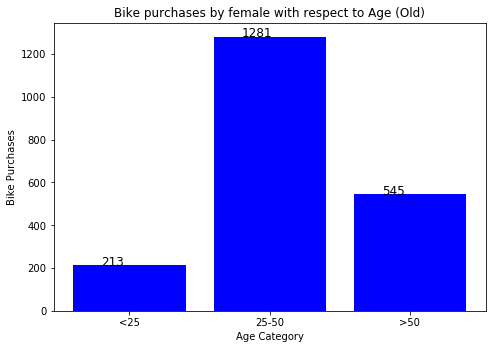

In [13]:
#female bar graph
female=[f1,f2,f3]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x1=np.arange(3)
plt.bar(x1,female,color='b')
plt.title('Bike purchases by female with respect to Age (Old)')
plt.xlabel('Age Category')
plt.xticks(x1,('<25','25-50','>50'))
for i in range(len(perGender)):
    plt.text(x = i-0.20, y = female[i], s = "{}".format(female[i]), size = 12)
plt.ylabel('Bike Purchases')
plt.show()

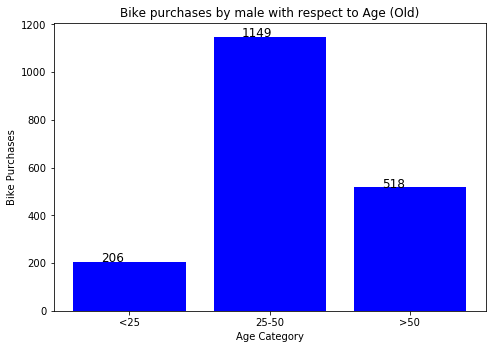

In [14]:
#male bar graph
male=[m1,m2,m3]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x1=np.arange(3)
plt.bar(x1,male,color='b')
plt.title('Bike purchases by male with respect to Age (Old)')
plt.xlabel('Age Category')
plt.xticks(x1,('<25','25-50','>50'))
for i in range(len(perGender)):
    plt.text(x = i-0.20, y = male[i], s = "{}".format(male[i]), size = 12)
plt.ylabel('Bike Purchases')
plt.show()

[419, 2430, 1063]


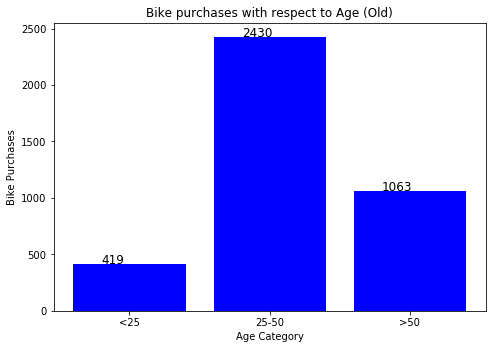

In [15]:
#overall bar graph
total=[f1+m1,f2+m2,f3+m3]
print(total)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x1=np.arange(3)
plt.bar(x1,total,color='b')
plt.title('Bike purchases with respect to Age (Old)')
plt.xlabel('Age Category')
plt.xticks(x1,('<25','25-50','>50'))
for i in range(0,len(total)):
    plt.text(x = i-0.20, y = total[i], s = "{}".format(total[i]), size = 12)
plt.ylabel('Bike Purchases')
plt.show()

<h2>Job Categorization</h2>

In [16]:
print(df['job_industry_category'].value_counts())
cat=[0,0,0,0,0,0,0,0,0]
for i in df['job_industry_category']:
    if i=='Manufacturing':
        cat[0]=cat[0]+1
    elif i=='Financial Services':
        cat[1]=cat[1]+1
    elif i=='Health':
        cat[2]=cat[2]+1
    elif i=='Retail':
        cat[3]=cat[3]+1
    elif i=='Property':
        cat[4]=cat[4]+1
    elif i=='IT':
        cat[5]=cat[5]+1
    elif i=='Entertainment':
        cat[6]=cat[6]+1
    elif i=='Agriculture':
        cat[7]=cat[7]+1
    elif i=='Telecommunications':
        cat[8]=cat[8]+1
print(cat)

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Agriculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64
[799, 774, 602, 358, 267, 223, 136, 113, 72]


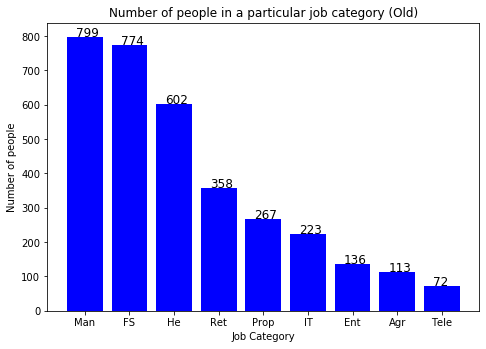

In [17]:
#bar graph
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x1=np.arange(9)
plt.bar(x1,cat,color='b')
plt.title('Number of people in a particular job category (Old)')
plt.xlabel('Job Category')
plt.xticks(x1,('Man','FS','He','Ret','Prop','IT','Ent','Agr','Tele'))
for i in range(0,len(cat)):
    plt.text(x = i-0.20, y = cat[i]+1, s = "{}".format(cat[i]), size = 12)
plt.ylabel('Number of people')
plt.show()

<h2>Wealth Categorization</h2>

In [18]:
print(df['wealth_segment'].value_counts())
massCust=[0,0,0]
for i in range(0,len(df)):
    if(df['wealth_segment'][i]=='Mass Customer'):
        if(df['Age'][i]<25):
            massCust[0]=massCust[0]+1
        elif(df['Age'][i]>=25 and df['Age'][i]<=50):
            massCust[1]=massCust[1]+1
        else:
            massCust[2]=massCust[2]+1
print(massCust)
hnw=[0,0,0]
for i in range(0,len(df)):
    if(df['wealth_segment'][i]=='High Net Worth'):
        if(df['Age'][i]<25):
            hnw[0]=hnw[0]+1
        elif(df['Age'][i]>=25 and df['Age'][i]<=50):
            hnw[1]=hnw[1]+1
        else:
            hnw[2]=hnw[2]+1
print(hnw)
affCust=[0,0,0]
for i in range(0,len(df)):
    if(df['wealth_segment'][i]=='Affluent Customer'):
        if(df['Age'][i]<25):
            affCust[0]=affCust[0]+1
        elif(df['Age'][i]>=25 and df['Age'][i]<=50):
            affCust[1]=affCust[1]+1
        else:
            affCust[2]=affCust[2]+1
print(affCust)

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64
[258, 1214, 528]
[121, 631, 269]
[127, 585, 267]


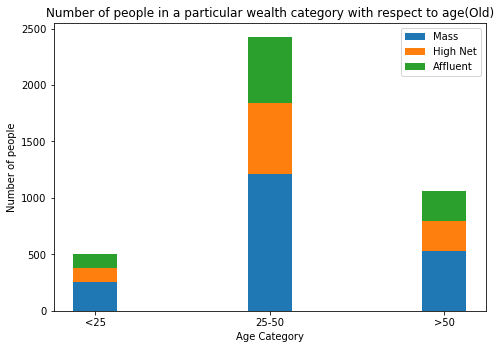

In [19]:
#bar graph
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bars=np.add(massCust,hnw).tolist()
x1=np.arange(3)
p1=plt.bar(x1,massCust,width=0.25)
p2=plt.bar(x1,hnw,width=0.25,bottom=massCust)
p3=plt.bar(x1,affCust,width=0.25,bottom=bars)
plt.title('Number of people in a particular wealth category with respect to age(Old)')
plt.xlabel('Age Category')
plt.xticks(x1,('<25','25-50','>50'))
plt.ylabel('Number of people')
plt.legend((p1[0], p2[0], p3[0]), ('Mass', 'High Net', 'Affluent'))
plt.show()

In [21]:
df.to_excel("CustomerDemographic2.xlsx")